In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import numpy as np

root_dir = Path("yelp_dataset") # Change w.r.t your own directory

### Project Question

We selected the top Yelp merchants, and then we had two tasks to analyze. The first one is to predict the merchant's score on the platform based on some characteristics of the merchant, such as geographical location, opening time, and price level. The second task is to conduct user experience based on each user's comment. Prediction; Before both tasks, we will perform data preprocessing and EDA process. For example, merge two different datasets into one, or use visual methods to explore the distribution of data, such as whether the merchant's rating is related to geographical location, etc.; after this task is completed, we hope to 1. Explore the high-scoring merchants Features, and can provide some suggestions to some merchants to help them improve service quality; 2. Build up a prediction model to analyze customer reviews and target some negative reviews to more carefully explore the problems and provide improvement suggestions.

### Problem Statement
**1. Predict restaurant ratings based on their innate attributes.**  
**2. Predict reviewers' ratings based on their comments (text feedbacks).**  
**Potential expansion (if time permits): more hollistic prediction of restaurant ratings based on business attributes and reviewers' feedback. (A merge of task 1 and 2)**

### Explore and visualize Data

In [ ]:
business_json = root_dir / "yelp_academic_dataset_business.json" # Change dataset name if necessary
data_file = open(business_json)

data = []
for line in data_file:
    data.append(json.loads(line))
checkin_df = pd.DataFrame(data)
data_file.close()

checkin_df.shape, checkin_df.dtypes

((150346, 14),
 business_id      object
 name             object
 address          object
 city             object
 state            object
 postal_code      object
 latitude        float64
 longitude       float64
 stars           float64
 review_count      int64
 is_open           int64
 attributes       object
 categories       object
 hours            object
 dtype: object)

In [ ]:
# 1. Shape of the Data
print("Shape of the Data:", checkin_df.shape)

Shape of the Data: (150346, 14)


In [ ]:
# 2. Data Types
print("Data Types:\n", checkin_df.dtypes)

Data Types:
 business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


In [ ]:
# 3. Descriptive Statistics
print("Descriptive Statistics:\n", checkin_df.describe())

Descriptive Statistics:
             latitude      longitude          stars   review_count  \
count  150346.000000  150346.000000  150346.000000  150346.000000   
mean       36.671150     -89.357339       3.596724      44.866561   
std         5.872759      14.918502       0.974421     121.120136   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.187293     -90.357810       3.000000       8.000000   
50%        38.777413     -86.121179       3.500000      15.000000   
75%        39.954036     -75.421542       4.500000      37.000000   
max        53.679197     -73.200457       5.000000    7568.000000   

            is_open  
count  150346.00000  
mean        0.79615  
std         0.40286  
min         0.00000  
25%         1.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  


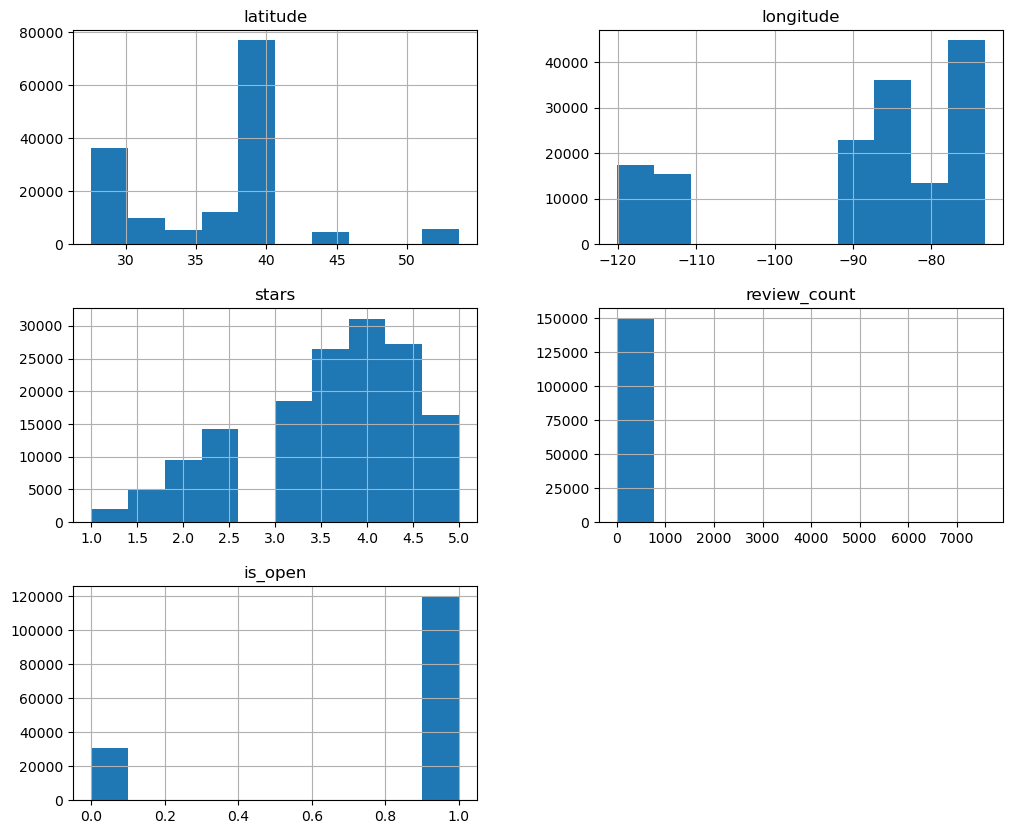

In [ ]:
# 4. Feature Summary
# Histograms
checkin_df.hist(figsize=(12,10))
plt.show()

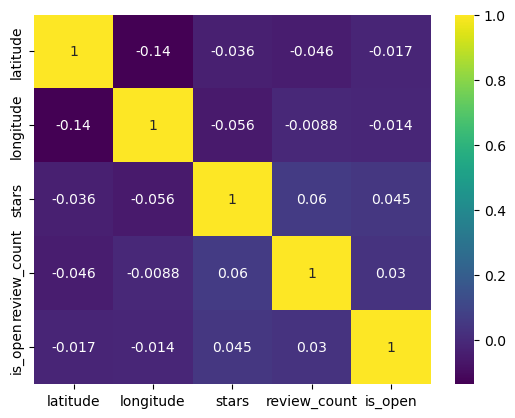

In [ ]:
# Correlation Plot
plt.figure()
sns.heatmap(checkin_df[["latitude", "longitude", "stars", "review_count", "is_open"]].corr(), annot=True, cmap='viridis')
plt.show()

From the figure of the correlation heatmap above, we can find that:
Latitude and Longitude: Both latitude and longitude have very weak correlations with all other
variables, which suggests that geographical location does not have a strong linear relationship
with the number of reviews (review_count), the open status of the business (is_open), or the
star ratings (stars); Stars and Review Count: There is a slight positive correlation (0.06) between
stars and review_count, which could suggest that higher-rated businesses tend to have slightly
more reviews, but the correlation is very weak, so the relationship may not be practically
significant; Open Status of Business: The is_open variable has a very weak positive correlation
with stars (0.045) and review_count (0.03), indicating that businesses that are open may have
marginally higher ratings and more reviews. However, the correlation is so weak that it's hard to
draw any firm conclusions from this alone.

In [ ]:
# 5. Handling Missing Values
print("Missing Values:\n", checkin_df.isnull().sum())

Missing Values:
 business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


### Deeper understanding of the Data

1. class imbalance (copy milestone 2)
2. distribution of the states (clustering plot), mean stars for each state. 
3. relationship of stars (and probably other features) and not opening restaurants

#### Checking potential imbalance

Another thing is, is the stars of the merchants really imbalanced? Judging from the histogram, we can see that though there is sort of imbalance among classes(the majority of merchants has star of 3.5-4.5), every class has sufficient samples to analyze. Therefore, we can resample the data to solve the imbalance issue

{'whiskers': [<matplotlib.lines.Line2D at 0x17ef317d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17ef32d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ef30d50>],
 'medians': [<matplotlib.lines.Line2D at 0x17ef482d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ede2250>],
 'means': []}

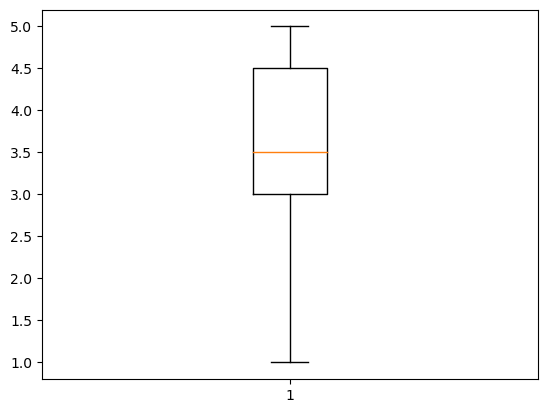

In [ ]:
plt.boxplot(checkin_df["stars"])

/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


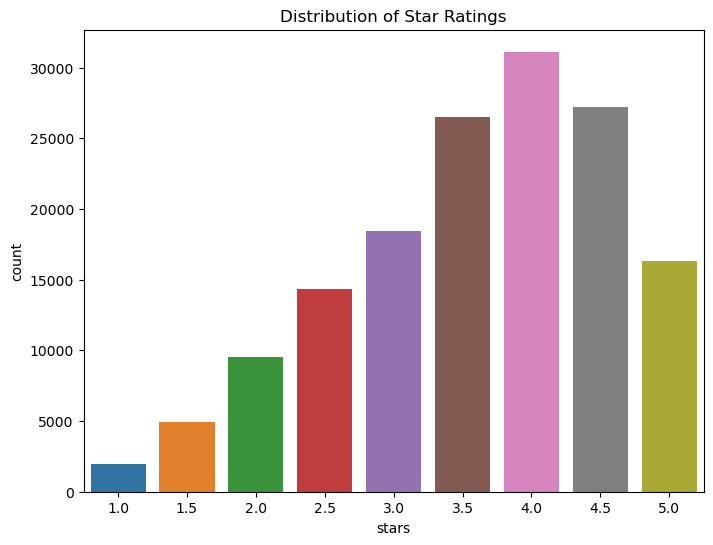

In [ ]:
# Identifying Patterns and Trends
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=checkin_df)
plt.title('Distribution of Star Ratings')
plt.show()

Judging from the histogram, we can see that though there is sort of imbalance among
classes(the majority of merchants has star of 3.5-4.5)

In [ ]:
# Potential solution for imbalance issue.
cnt = checkin_df[checkin_df['stars']==1.0].shape[0]

new_df = pd.DataFrame()
for s in range(2, 11):
    star = s / 2
    sub_df = checkin_df[checkin_df['stars'] == star].sample(cnt)
    new_df = pd.concat([new_df, sub_df], axis=0)
new_df.shape

(17874, 14)

#### Distribution of stars over different states (and cities)

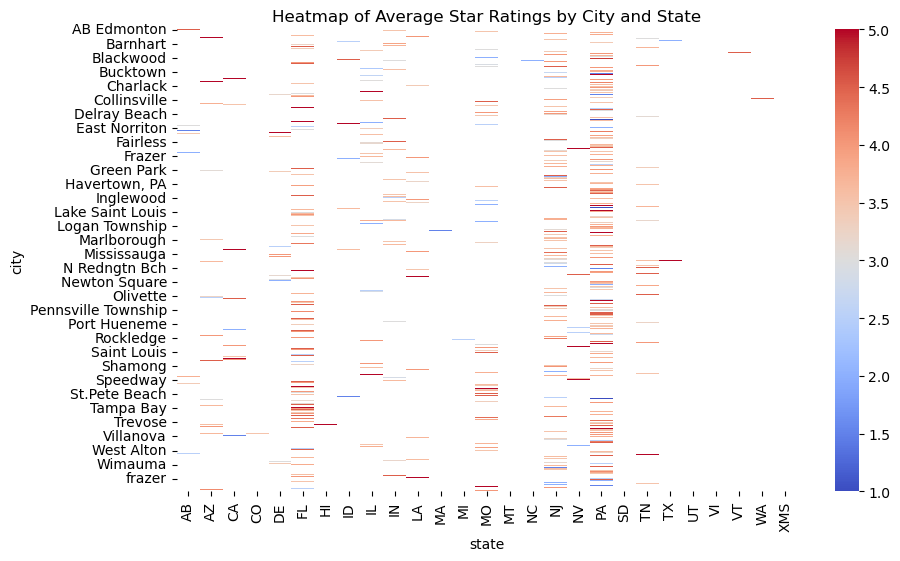

In [ ]:
# Heatmap for Geographic Data
plt.figure(figsize=(10, 6))
sns.heatmap(checkin_df.pivot_table(index='city', columns='state', values='stars'), cmap='coolwarm')
plt.title('Heatmap of Average Star Ratings by City and State')
plt.show()

There is a noticeable variation in ratings within states, which suggests that within the same
state, different cities can have very different average star ratings. Some states, like those
represented by "PA" (Pennsylvania), show a broad spectrum of ratings across different cities.
Meanwhile, other states have less variability, although this could be due to fewer cities
represented from those states in the data.

#### Review data: the count of reviews

/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


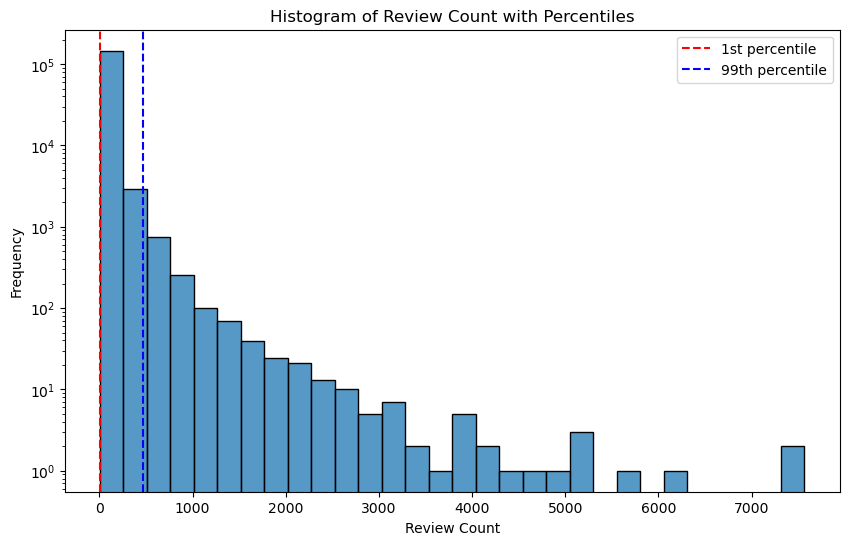

In [ ]:
# Outliers Detection

percentiles = checkin_df['review_count'].quantile([0.1, 0.99]).values

plt.figure(figsize=(10, 6))
sns.histplot(checkin_df['review_count'], bins=30, kde=False)
plt.yscale('log')

# Adding vertical lines for the 25th and 75th percentiles
plt.axvline(x=percentiles[0], color='red', linestyle='--', label='1st percentile')
plt.axvline(x=percentiles[1], color='blue', linestyle='--', label='99th percentile')

plt.title('Histogram of Review Count with Percentiles')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The distribution of review counts is right-skewed, with a long tail extending to the right, which
indicates that while most businesses have a relatively small number of reviews, there are a few
businesses with a very large number of reviews. The majority of the data points fall below the
1000 review count mark, suggesting that the central tendency of the dataset is low regarding
review counts. Businesses with a very high number of reviews could be considered outliers. The
1th percentile is very close to the lower end of the distribution, indicating that 1% of the
businesses have a small number of reviews. The 99th percentile is also relatively close to the
1th percentile compared to the range of the data, which shows that 98% of the data (from the
1th to the 99th percentile) is clustered within a narrow band of the review count spectrum. The
logarithmic scale on the y-axis helps to visualize the count of businesses with different review
counts, emphasizing that there are exponentially more businesses with fewer reviews and
exponentially fewer businesses with a large number of reviews.

#### Stars of opening and unopening restaurants

/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


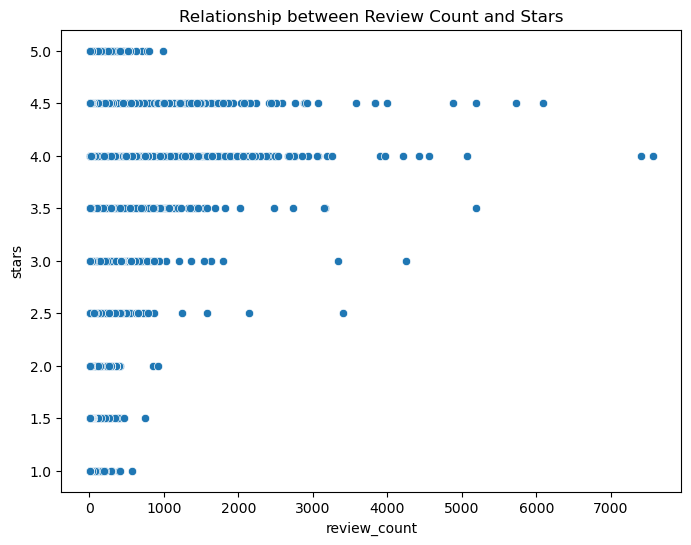

/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a12345/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


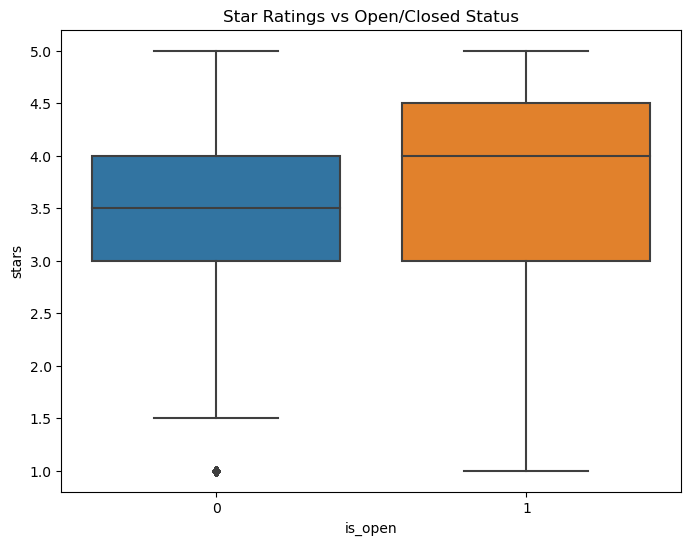

In [ ]:
# Exploring the relationship between 'stars' and 'review_count'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_count', y='stars', data=checkin_df)
plt.title('Relationship between Review Count and Stars')
plt.show()

# Exploring the relationship between 'stars' and 'is_open'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_open', y='stars', data=checkin_df)
plt.title('Star Ratings vs Open/Closed Status')
plt.show()


For businesses looking to increase their visibility through reviews, this data suggests that there
is significant room for growth in review counts, as only a few businesses have managed to
accumulate a high number of reviews. The median star rating for both open and closed
businesses is above 3.0, which is above average, but the median for open businesses is slightly
higher than for closed businesses. The Interquartile Range (IQR), represented by the box, is
narrower for open businesses, implying that the star ratings for open businesses are more
clustered around the median. Closed businesses have a more spread out IQR, suggesting
greater variability in their star ratings.

### Manipulating text data

the size of the text data is quite large(> 5GB), so we choose to use a portion of them

In [ ]:
cnt = 0
data = []
with open(root_dir/'yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    for line in f:
        cnt += 1
        data.append(json.loads(line))

        if cnt > 10000:
            break

review_df = pd.DataFrame(data)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text into a single string
combined_text = ' '.join(review_df['text'])

# Tokenize the words
words = nltk.word_tokenize(combined_text)

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

addtional_words = ["'s", "n't", "would", "could", "get", 'back', '...', 'really', "'ve", 'us', 'got', 'also', 
                   "``", "''", "'m", 'even']
for w in addtional_words:
    stop_words.add(w)

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

# Count occurrences of words
word_counts = Counter(filtered_words)

# Get the 5 most common words
most_common_words = word_counts.most_common(5)
print(most_common_words)


[('food', 4859), ('place', 4841), ('good', 4745), ('great', 3811), ('time', 3051)]


#### What does the reviews of a restaurant mostly talk about?


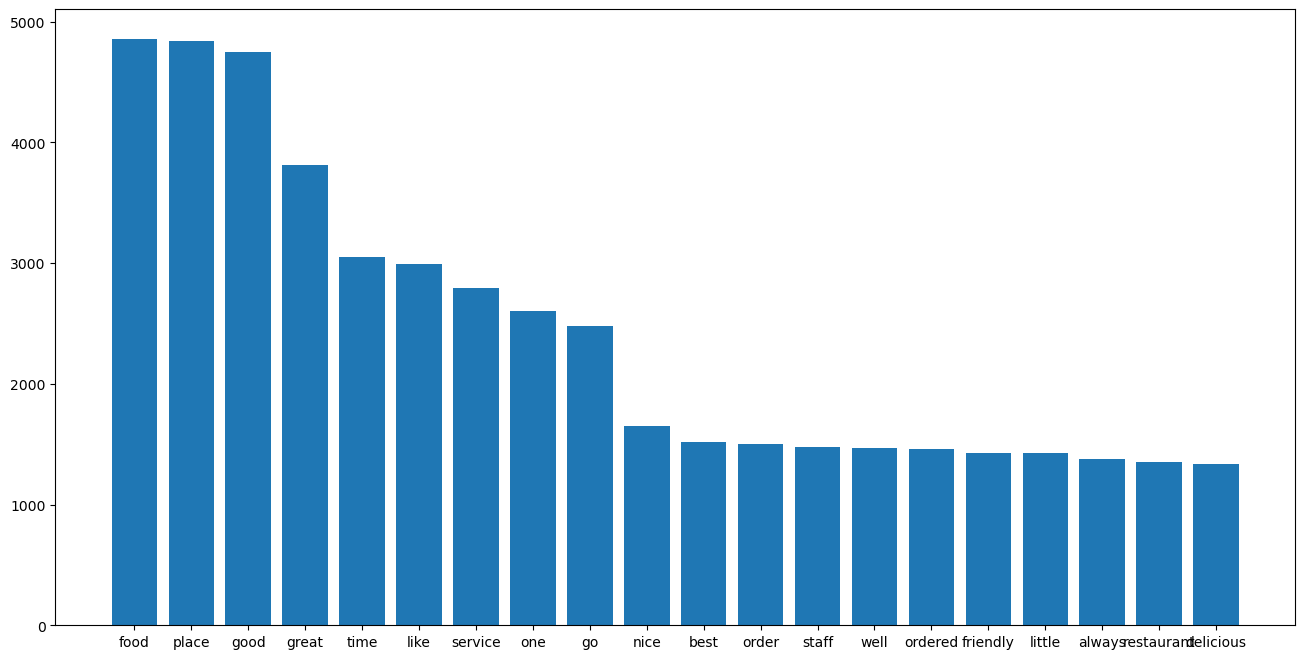

In [ ]:
most_common_words = word_counts.most_common(20)
words = [t[0] for t in most_common_words]
cnts = [t[1] for t in most_common_words]

fig, ax = plt.subplots(figsize= (16, 8))
ax.bar(x=words, height=cnts)


plt.show()

#### Different types of text encoding and visualization

We encode the review texts using TF-IDF encoding and BERT encoding. After that we apply
t-SNE to reduce the dimension of the encodings to 2 and visualize the distribution of stars.

In [ ]:
cnt = 0
data = []
with open(root_dir/'demo.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


review_df = pd.DataFrame(data[:3000])
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


##### Bert Encodings

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # Or choose any other variant you want
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)

# Tokenize the sentence and convert to IDs
tokenized_tensors = review_df['text'].apply(lambda x: tokenizer(x, return_tensors="pt", padding='max_length', truncation=True, max_length = 512))


In [ ]:
# Forward pass through BERT model
from tqdm import tqdm
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Define batch size
batch_size = 32

# Create a PyTorch DataLoader with the defined batch size
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
dataloader = DataLoader(tokenized_tensors, batch_size=batch_size, collate_fn = data_collator)

output = []
with torch.no_grad():
    for batch in tqdm(dataloader):
        # import pdb; pdb.set_trace()
        input_ids, attention_masks = batch['input_ids'].squeeze().to(device), batch['attention_mask'].squeeze().to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_masks)

        # Extract [CLS] token embedding (the first token)

        output.append(outputs.last_hidden_state[:, 0, :].detach().cpu())

cls_embeddings = torch.cat(output, dim=0)
print("Shape of [CLS] embedding:", cls_embeddings.shape)

100%|██████████| 94/94 [01:48<00:00,  1.15s/it]

Shape of [CLS] embedding: torch.Size([3000, 768])


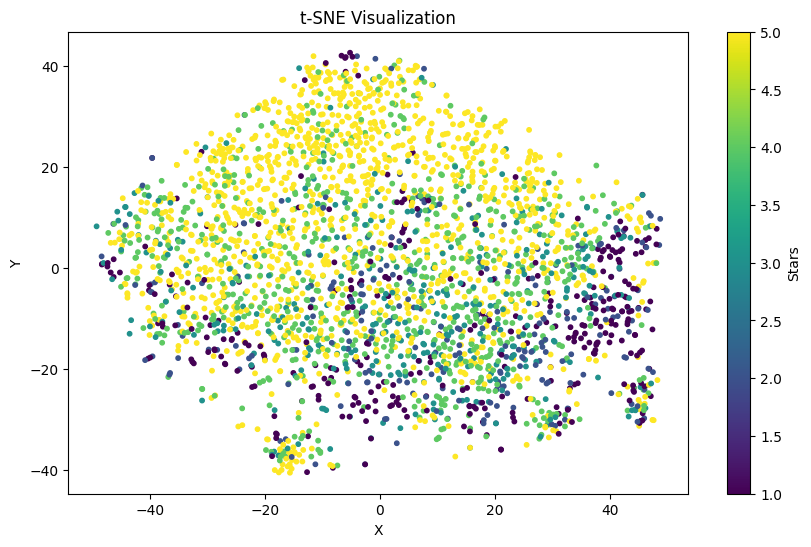

In [ ]:
# Visualize
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(cls_embeddings.numpy())

df = pd.DataFrame(tsne_result, columns=['X', 'Y'])
df['stars'] = review_df["stars"]
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['X'], df['Y'], c=df['stars'], cmap='viridis', s=10)

plt.colorbar(scatter, label='Stars')

plt.title('t-SNE Visualization')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()


##### TF-IDF Encodings

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text into a single string
combined_text = ' '.join(review_df['text'])

nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the words
words = nltk.word_tokenize(combined_text)

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

addtional_words = ["'s", "n't", "would", "could", "get", 'back', '...', 'really', "'ve", 'us', 'got', 'also',
                   "``", "''", "'m", 'even']
for w in addtional_words:
    stop_words.add(w)

# Remove stopwords
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

# Count occurrences of words
word_counts = Counter(filtered_words)

# Get the 5 most common words
most_common_words = word_counts.most_common(5)
print(most_common_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('food', 1435), ('place', 1433), ('good', 1404), ('great', 1142), ('time', 965)]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(review_df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

feature_names

array(['00', '000', '00am', ..., '安い', '最高のチョイスだと思います',
       '特に夏のニューオーリンズはジメジメして暑いから'], dtype=object)

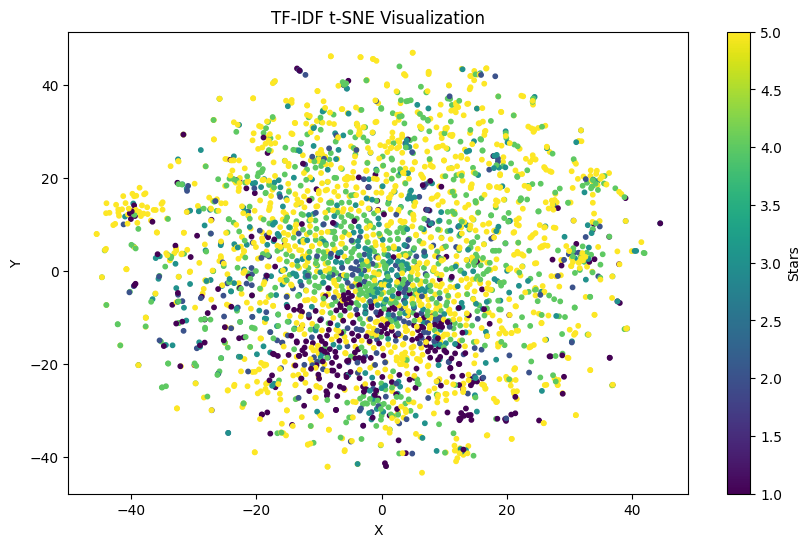

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
embedded = tsne.fit_transform(tfidf_matrix.toarray())

df = pd.DataFrame(embedded, columns=['X', 'Y'])
df['stars'] = review_df["stars"]
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['X'], df['Y'], c=df['stars'], cmap='viridis', s=10)

plt.colorbar(scatter, label='Stars')

plt.title('TF-IDF t-SNE Visualization')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

The t-SNE visualizations provide a clear comparison between the BERT sentence embeddings
and TF-IDF sentence embeddings in terms of clustering similar reviews by star ratings. The
BERT embedding appears to result in better-defined clusters. This indicates that BERT's
contextual understanding leads to a more nuanced grouping of reviews, where reviews with
similar sentiments and contextual meanings are closer together. In contrast, the TF-IDF
embedding, while still showing some clustering, does not achieve the same level of distinction
as BERT. This suggests that TF-IDF is less effective at capturing the subtleties of language that
BERT, a deep learning model, can understand.

### Data Preprocessing

In [27]:
checkin_df.head()
checkin_df = checkin_df[~ checkin_df["categories"].isna()]
len(checkin_df)

150243

In [28]:
# dive into `attributes` and `categories` of the merchants
cat_set = set()
attr_set = set()
for i, row in checkin_df.iterrows():
    cat = row['categories']
    attr = row['attributes']
    if cat:
        for c in cat.split(', '):
            cat_set.add(c)
    
    if attr:
        for k in attr.keys():
            attr_set.add(k)
            
# Write all categories into a .txt file for potential future use. 
category_file = "./categories.txt"
if os.path.exists(category_file):
    os.remove(category_file)
with open(category_file, "a") as f: 
    for i in cat_set: 
        f.write(i + "\n")

**Filter out restaurants from all merchanges by selecting only those containing "Food" in their categories. Set this DataFrame as the final dataset.**

In [29]:
restaurant_df = checkin_df[checkin_df["categories"].apply(lambda x: "Food" in x)]
restaurant_df.head()
# restaurant_df.iloc[0]["attributes"]["BusinessParking"]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


#### Handle Attribute list

In [30]:
# Flatten out "attribute" column. 
attr_list = [] 
for i, row in restaurant_df.iterrows():
    record = {}
    attr = row['attributes'] 
    if attr: 
        for k in attr.keys():
            v = eval(attr[k]) 
            if (v is not None) and (not isinstance(v, dict)):
                record[k] = v 
            elif (v is not None) and (isinstance(v, dict)): 
                for k_p in v.keys(): 
                    k_final = f"{k}_{k_p}" 
                    record[k_final] = v[k_p] 
    attr_list.append(record)
# Print all attributes that we may use. 
total_attrs = set() 
for i in attr_list: 
    total_attrs.update(i.keys())
print(total_attrs)

# Construct a DataFrame using the flattened attributes. Handle None and NaN.
attr_df = pd.DataFrame(attr_list)
attr_df = attr_df.fillna(value = np.nan)

{'RestaurantsDelivery', 'DogsAllowed', 'BYOBCorkage', 'Corkage', 'GoodForMeal_dessert', 'BestNights_sunday', 'RestaurantsReservations', 'BestNights_monday', 'HairSpecializesIn_kids', 'Ambience_classy', 'GoodForMeal_lunch', 'GoodForKids', 'Ambience_trendy', 'RestaurantsTableService', 'Music_dj', 'RestaurantsPriceRange2', 'Music_background_music', 'RestaurantsGoodForGroups', 'RestaurantsAttire', 'GoodForMeal_breakfast', 'GoodForMeal_dinner', 'Caters', 'Open24Hours', 'BestNights_friday', 'Ambience_intimate', 'ByAppointmentOnly', 'Music_no_music', 'DietaryRestrictions_vegan', 'BusinessParking_street', 'CoatCheck', 'Ambience_upscale', 'GoodForMeal_latenight', 'BestNights_tuesday', 'Ambience_touristy', 'BusinessAcceptsBitcoin', 'DietaryRestrictions_gluten-free', 'BestNights_saturday', 'OutdoorSeating', 'HasTV', 'Ambience_hipster', 'NoiseLevel', 'Music_video', 'DietaryRestrictions_soy-free', 'Ambience_casual', 'DietaryRestrictions_kosher', 'WiFi', 'BestNights_thursday', 'BYOB', 'DietaryRestri

In [31]:
# Inspect values in each column
print(attr_df.shape)
for col in attr_df.columns: 
    print(col, attr_df[col].unique())

(33405, 78)
RestaurantsDelivery [False nan True]
OutdoorSeating [False nan True]
BusinessAcceptsCreditCards [False True nan]
BusinessParking_garage [False nan True]
BusinessParking_street [True nan False]
BusinessParking_validated [False nan True]
BusinessParking_lot [False True nan]
BusinessParking_valet [False nan True]
BikeParking [True False nan]
RestaurantsPriceRange2 [ 1. nan  2.  3.  4.]
RestaurantsTakeOut [True nan False]
ByAppointmentOnly [False nan True]
WiFi ['free' nan 'no' 'paid']
Alcohol ['none' nan 'beer_and_wine' 'full_bar']
Caters [True False nan]
WheelchairAccessible [nan True False]
GoodForKids [nan True False]
RestaurantsAttire [nan 'casual' 'dressy' 'formal']
RestaurantsReservations [nan False True]
CoatCheck [nan False True]
DogsAllowed [nan False True]
RestaurantsTableService [nan False True]
RestaurantsGoodForGroups [nan True False]
HasTV [nan True False]
HappyHour [nan False True]
DriveThru [nan True False]
Ambience_touristy [nan False True]
Ambience_hipster [n

In [32]:
# Drop columns with only nan and False. Those have no meaning... 
attr_df_copy = attr_df.copy()
for col in attr_df_copy.columns: 
    values = pd.Series(attr_df_copy[col].unique()).dropna() 
    if len(values) <= 1: 
        attr_df_copy = attr_df_copy.drop(col, axis = 1)
print(attr_df_copy.shape)
for col in attr_df_copy.columns: 
    print(col, attr_df_copy[col].unique())

(33405, 70)
RestaurantsDelivery [False nan True]
OutdoorSeating [False nan True]
BusinessAcceptsCreditCards [False True nan]
BusinessParking_garage [False nan True]
BusinessParking_street [True nan False]
BusinessParking_validated [False nan True]
BusinessParking_lot [False True nan]
BusinessParking_valet [False nan True]
BikeParking [True False nan]
RestaurantsPriceRange2 [ 1. nan  2.  3.  4.]
RestaurantsTakeOut [True nan False]
ByAppointmentOnly [False nan True]
WiFi ['free' nan 'no' 'paid']
Alcohol ['none' nan 'beer_and_wine' 'full_bar']
Caters [True False nan]
WheelchairAccessible [nan True False]
GoodForKids [nan True False]
RestaurantsAttire [nan 'casual' 'dressy' 'formal']
RestaurantsReservations [nan False True]
CoatCheck [nan False True]
DogsAllowed [nan False True]
RestaurantsTableService [nan False True]
RestaurantsGoodForGroups [nan True False]
HasTV [nan True False]
HappyHour [nan False True]
DriveThru [nan True False]
Ambience_touristy [nan False True]
Ambience_hipster [n

In [33]:
# Map noise level to numerical order
attr_df_copy["NoiseLevel"] = attr_df_copy["NoiseLevel"].map({"quiet": 1, "average": 2, "loud": 3, "very_loud": 4})

In [34]:
# Create one-hot columns. 
# One-hot columns are the ones with categories. 
one_hot_cols = ["WiFi", "Alcohol", "RestaurantsAttire", "Smoking", "BYOBCorkage", "AgesAllowed"]
attr_df_dummies = pd.get_dummies(attr_df_copy[one_hot_cols], dummy_na = True)
attr_df_copy = attr_df_copy.drop(one_hot_cols, axis = 1).join(attr_df_dummies)
attr_df_copy = attr_df_copy.astype(float)
attr_df_copy.head()

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BikeParking,RestaurantsPriceRange2,...,Smoking_outdoor,Smoking_yes,Smoking_nan,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,BYOBCorkage_nan,AgesAllowed_18plus,AgesAllowed_allages,AgesAllowed_nan
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Handle Hours

In [35]:
# Show restaurant hours by opening duration.
hours_df = restaurant_df[["hours"]]
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hours_list = []
for i, row in restaurant_df.iterrows():
    record = {}
    hour_dict = row["hours"]
    if not isinstance(hour_dict, dict): 
        hours_list.append({})
    else: 
        for k, v in hour_dict.items():
            start_time, end_time = v.split("-")
            start_hour, start_minute = [int(i) for i in start_time.split(":")]
            end_hour, end_minute = [int(i) for i in end_time.split(":")]
            open_time = (end_hour - start_hour) + (end_minute - start_minute) / 60
            # In case a restaurant opens from the end of the first day to the start of the second day
            if open_time <= 0: 
                open_time += 24
            record[f"{k}_hour"] = open_time
            # If a day of week is missing, the restaurant does not open on that day. Opening hours should be 0. 
        for d in days_of_week: 
            if d not in record.keys():
                record[f"{d}_hour"] = 0
        hours_list.append(record)
hours_df_copy = pd.DataFrame(hours_list)
hours_df_copy.shape

(33405, 7)

#### Concatenate sub-dataframes together. This is our final DataFrame

In [36]:
# Drop "categories", "attribute", "hours" in restaurant_df
restaurant_df_copy = restaurant_df.drop(["attributes", "categories", "hours"], axis = 1)
restaurant_df_copy = restaurant_df_copy.reset_index(drop = True)
print(restaurant_df_copy.shape)
# print(restaurant_df_copy)
restaurant_df_copy = pd.concat([restaurant_df_copy, attr_df_copy], axis = 1)
print(restaurant_df_copy.shape)
restaurant_df_copy = pd.concat([restaurant_df_copy, hours_df_copy], axis = 1)
print(restaurant_df_copy.shape)
# NOTE: 'restaurant_df_copy' is the dataframe we'll use! Feel free to change it to 'restaurant_df'

(33405, 11)
(33405, 98)
(33405, 105)


#### Split DataFrame into training and test set. 
**We haven't imputed the data yet. Here's how we can impute the data and underlying philosophy:**  
We can impute all columns with np.nan values with mean imputation.  
The columns that may have np.nan values are attribute-related columns and hour-related columns. After one-hot coversion, the attribute-related columns with np.nan values are those that only possess "True/False" values (categorical features are already converted to one-hot columns with an additional `<feature>_nan` indicator column). It is therefore reasonable to impute missing attribute values with the data average (i.e., emperical probability).  
Hour-related columns are now in numerical values, so it should also be reasonable to impute missing values with the emperical mean. 

In [37]:
# Sanity check: one_hot_columns and their sub-columns should have no np.nan values.
one_hot_cols = ["WiFi", "Alcohol", "RestaurantsAttire", "Smoking", "BYOBCorkage", "AgesAllowed"]
dict(restaurant_df_copy.isna().sum())

{'business_id': 0,
 'name': 0,
 'address': 0,
 'city': 0,
 'state': 0,
 'postal_code': 0,
 'latitude': 0,
 'longitude': 0,
 'stars': 0,
 'review_count': 0,
 'is_open': 0,
 'RestaurantsDelivery': 9422,
 'OutdoorSeating': 15268,
 'BusinessAcceptsCreditCards': 4317,
 'BusinessParking_garage': 5784,
 'BusinessParking_street': 6617,
 'BusinessParking_validated': 5960,
 'BusinessParking_lot': 5986,
 'BusinessParking_valet': 4858,
 'BikeParking': 9834,
 'RestaurantsPriceRange2': 5201,
 'RestaurantsTakeOut': 5265,
 'ByAppointmentOnly': 30184,
 'Caters': 13931,
 'WheelchairAccessible': 24615,
 'GoodForKids': 17034,
 'RestaurantsReservations': 16732,
 'CoatCheck': 31952,
 'DogsAllowed': 26875,
 'RestaurantsTableService': 26088,
 'RestaurantsGoodForGroups': 17846,
 'HasTV': 17286,
 'HappyHour': 28604,
 'DriveThru': 27988,
 'Ambience_touristy': 18854,
 'Ambience_hipster': 19036,
 'Ambience_romantic': 18699,
 'Ambience_divey': 19314,
 'Ambience_intimate': 18895,
 'Ambience_trendy': 19256,
 'Ambienc

In [48]:
# Impute columns in attr_df_copy other than one_hot_cols
# Directly impute the whole DataFrame is equivalent as imputing the rest of the columns: we have handled the one-hot columns so there should be 
# no np.nan values in those columns already. 
import sklearn.model_selection
from sklearn.impute import SimpleImputer
train_df, test_df = sklearn.model_selection.train_test_split(restaurant_df_copy, test_size = 0.2, random_state = 209)
train_df_imputed = train_df.copy() 
test_df_imputed = test_df.copy() 
numeric_columns = train_df.select_dtypes(include = "number").columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df_imputed[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df_imputed[numeric_columns] = imputer.transform(test_df[numeric_columns])

In [58]:
train_df_imputed.to_csv("train_df_imputed.csv")

In [49]:
# Sanity check: one_hot_columns and their sub-columns should have no np.nan values.
one_hot_cols = ["WiFi", "Alcohol", "RestaurantsAttire", "Smoking", "BYOBCorkage", "AgesAllowed"]
print(dict(train_df_imputed.isna().sum()))
print(dict(test_df_imputed.isna().sum()))

{'business_id': 0, 'name': 0, 'address': 0, 'city': 0, 'state': 0, 'postal_code': 0, 'latitude': 0, 'longitude': 0, 'stars': 0, 'review_count': 0, 'is_open': 0, 'RestaurantsDelivery': 0, 'OutdoorSeating': 0, 'BusinessAcceptsCreditCards': 0, 'BusinessParking_garage': 0, 'BusinessParking_street': 0, 'BusinessParking_validated': 0, 'BusinessParking_lot': 0, 'BusinessParking_valet': 0, 'BikeParking': 0, 'RestaurantsPriceRange2': 0, 'RestaurantsTakeOut': 0, 'ByAppointmentOnly': 0, 'Caters': 0, 'WheelchairAccessible': 0, 'GoodForKids': 0, 'RestaurantsReservations': 0, 'CoatCheck': 0, 'DogsAllowed': 0, 'RestaurantsTableService': 0, 'RestaurantsGoodForGroups': 0, 'HasTV': 0, 'HappyHour': 0, 'DriveThru': 0, 'Ambience_touristy': 0, 'Ambience_hipster': 0, 'Ambience_romantic': 0, 'Ambience_divey': 0, 'Ambience_intimate': 0, 'Ambience_trendy': 0, 'Ambience_upscale': 0, 'Ambience_classy': 0, 'Ambience_casual': 0, 'GoodForMeal_dessert': 0, 'GoodForMeal_latenight': 0, 'GoodForMeal_lunch': 0, 'GoodForM

In [69]:
from sklearn.neighbors import KNeighborsRegressor

meta_df, X_train = train_df_imputed.iloc[:, :8], train_df_imputed.iloc[:, 10:]
y_train = train_df_imputed["stars"]

# for test data
X_test = test_df_imputed.iloc[:, 10:]
y_test = test_df_imputed["stars"]

KNeighborsRegressor(n_neighbors=10)

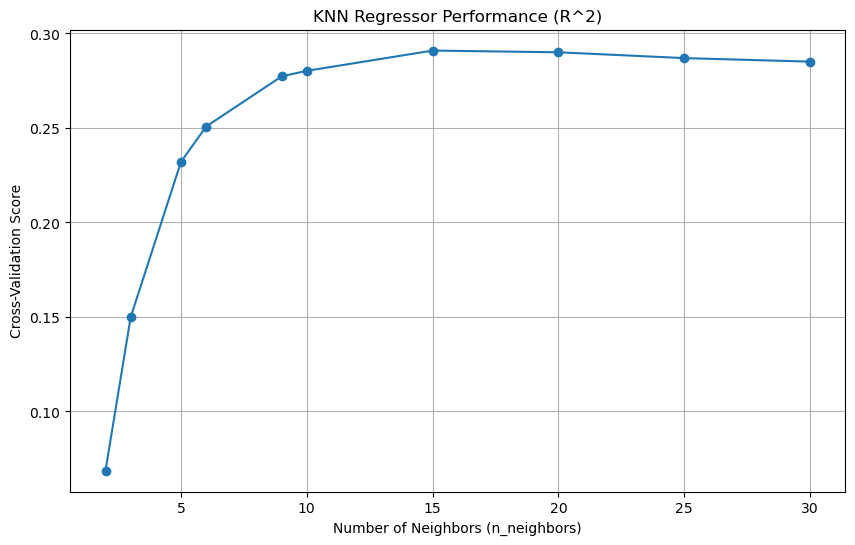

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
n_neighbors_range = [2, 3, 5, 6, 9, 10, 15, 20, 25, 30]
cv_scores = []

for k in n_neighbors_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('KNN Regressor Performance (R^2)')
plt.grid(True)
plt.show()

In [75]:
best_k = n_neighbors_range[np.argmax(cv_scores)]
print("the best n_neighbors is: ", n_neighbors_range[np.argmax(cv_scores)])

the best n_neighbors is:  15


In [76]:
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train, y_train)

knn_regressor.score(X_test, y_test)

0.3106509608893726

### Interpret the baseline model result

We first use geographical feature and then fit a KNN model using cross validation to find the the best n_neibors which is 15, and get the R^2 result in test set 0.311. 

### Final Model Pipeline:

Since KNN (distance-based) model perform not bad on test set using R^2 as a metric, and thus for our final model, we would conduct further feature engineering process, including select / drop features and feature transformation. We would also try Tree-based model to see if there would be any improvement. When choosing between models, we would based on the cross validation result. 

Our pipeline is built. We first preprocess the data, including imputation, and then fit the model and use the cross_validation, and finally we compare between models based on the model performance on test set. 

In [7]:
cnt = 0
data = []
with open(root_dir/'demo.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


review_df = pd.DataFrame(data)
review_df.shape

(10001, 9)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(review_df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()



24532

100%|██████████| 7/7 [02:12<00:00, 18.97s/it]


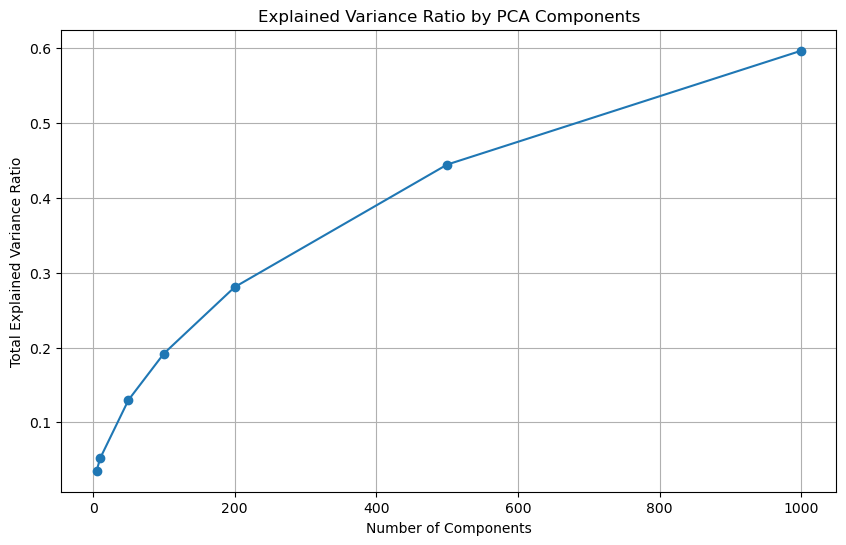

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm

dimensions = [5, 10, 50, 100, 200, 500, 1000]
explained_variances = []

for dim in tqdm(dimensions):
    pca = PCA(n_components=dim)
    pca.fit(tfidf_matrix.toarray())
    explained_variances.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(dimensions, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Perform PCA with the best dimension
pca_features = pca.transform(tfidf_matrix.toarray())

# Split the PCA features into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_features, review_df['stars'], test_size=0.2, random_state=42)




R^2 Score with PCA: 0.1645871839303471


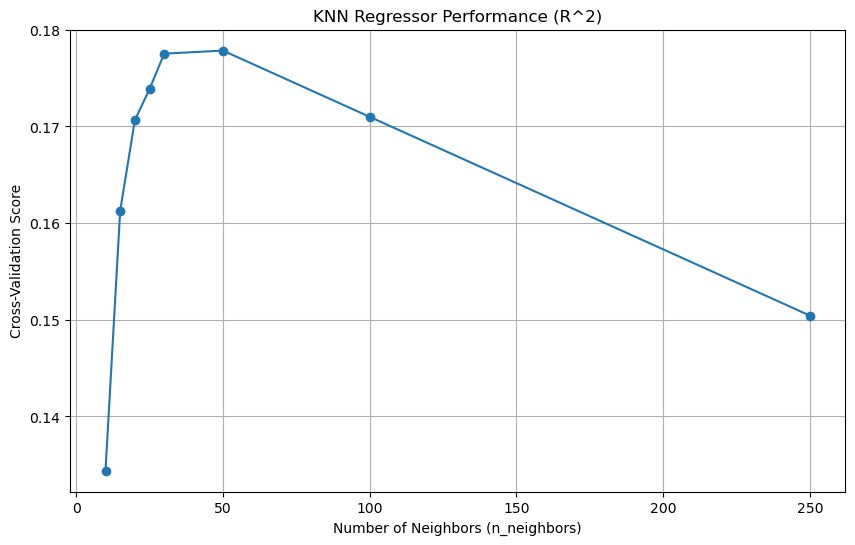

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
n_neighbors_range = [10, 15, 20, 25, 30, 50, 100, 250]
cv_scores = []

for k in n_neighbors_range:
    knn_regressor_pca = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regressor_pca, X_train_pca, y_train_pca, cv=5)
    cv_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('KNN Regressor Performance (R^2)')
plt.grid(True)
plt.show()

In [32]:
best_k = n_neighbors_range[np.argmax(cv_scores)]
print("the best n_neighbors is: ", n_neighbors_range[np.argmax(cv_scores)])

# Fit a KNNRegressor model
knn_regressor_pca = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor_pca.fit(X_train_pca, y_train_pca)

# Evaluate the model
score_pca = knn_regressor_pca.score(X_test_pca, y_test_pca)
print("R^2 Score with PCA:", score_pca)

the best n_neighbors is:  50
R^2 Score with PCA: 0.18280287793932593


## Interpret the Baseline results

We first use PCA to reduce the dimension of sentence embedding to 1000, and then fit a KNN model using cross validation to find the the best n_neibors which is 50, and get the R^2 result in test set 0.182. Then, we fit a linear regression and get R^2 0.588 on test set, which indcates the distance-based model does not work well for text embedding, and thus linear regression can easlity outperform a tuned KNN. 

In [33]:
from sklearn.linear_model import LinearRegression

# Fit a LinearRegression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_pca, y_train_pca)

# Evaluate the model
score_linear = linear_regressor.score(X_test_pca, y_test_pca)
print("R^2 Score with Linear Regression:", score_linear)


R^2 Score with Linear Regression: 0.5878787790817654


### Final Model Pipeline:

Since KNN (distance-based) model perform bad on test set using R^2 as a metric much worse than linear regression, and thus for our final model, we would conduct further feature engineering process, including select / drop features and feature transformation, and then use Linear Regression (Ridge and LASSO). We would also try Tree-based model to see if there would be any improvement. When choosing between models, we would based on the cross validation result. 

Our pipeline is built. We first preprocess the data, including imputation, and then fit the model and use the cross_validation, and finally we compare between models based on the model performance on test set. 